In [1]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield
        
%display latex
import ulbc
from flowstar import *
from ulbc.bondcalculus import *

# Setup test context

In [2]:
from ulbc.tests.test_systems import *

In [3]:
init3 = initials3.__wrapped__()

In [4]:
R.<x, y> = RIF[]

In [5]:
ringxy = (R, (x, y))

In [6]:
syst = system.__wrapped__(ringxy); syst

<function system.<locals>._ at 0x7f93d77fbc10>

In [7]:
rset = reach.__wrapped__(syst); rset

<function reach.<locals>._ at 0x7f93d56d95e0>

In [8]:
rt = reach_tree.__wrapped__(syst); rt

<function reach_tree.<locals>._ at 0x7f93d7796dc0>

# Tests

In [9]:
t = RIF(5)

In [10]:
s = syst(*init3)

In [11]:
initial_form = InitialForm.SPLIT_VARS

In [12]:
r = s.reach_tree(10, initial_form=initial_form); r

In [13]:
r.top_level_domain

[1.1000000000000001?, 1.6?]

In [14]:
r0 = r(())

In [15]:
r0.system.y0_composed

[1.1000000000000001?, 1.6?]

In [16]:
RIF(solution(*init3, 5)[0])

1.8?

In [17]:
from ulbc.interval_utils import *

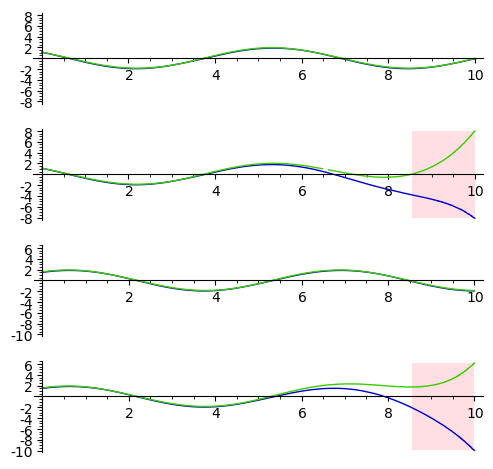

In [18]:
plot_full_comparison((0, 10), r0, solution, init3, 1, 2, 0.5)

In [19]:
%time function_max_width(lambda t: solution(*init3, t), 0, 10, 1e-3)

CPU times: user 2.6 s, sys: 108 µs, total: 2.6 s
Wall time: 2.63 s


1.99200992500113

In [20]:
%time function_max_width(lambda t: r0(t), 0, 10, 0.1)

CPU times: user 37.9 ms, sys: 2.23 ms, total: 40.2 ms
Wall time: 39.2 ms


16.1554872948187

In [21]:
check_containment(lambda t: solution(*init3, t), r0, 0, 10, 0.5)

In [22]:
check_inflation(lambda t: solution(*init3, t), r0, 9.0, 0, 10, 0.5)

NameError: name 'check_inflation' is not defined

In [ ]:
check_containment(r0, lambda t: solution(*init3, t), 0, 10, 0.5)